In [83]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
kelp = pd.read_csv("Kelp Trader Log CSV.csv", sep=",")
d1 = pd.read_csv("d1csv.csv", sep=",")

In [100]:
d1 = d1[d1['symbol'] == 'KELP']
# d1 = d1[d1['Dist from VWAP'] < 1]
# d1 = d1[d1['Dist from VWAP'] > -1]

In [101]:
kelplog_inf_buyer = kelp[kelp['buyer'] == "InferredBot"]
vwap_inf_buyer = d1[d1['buyer'] == "InferredBot"]
vwap_inf_buyer = vwap_inf_buyer.drop(columns=['symbol', 'seller'])
kelplog_inf_buyer = kelplog_inf_buyer.drop(columns=['symbol', 'seller'])


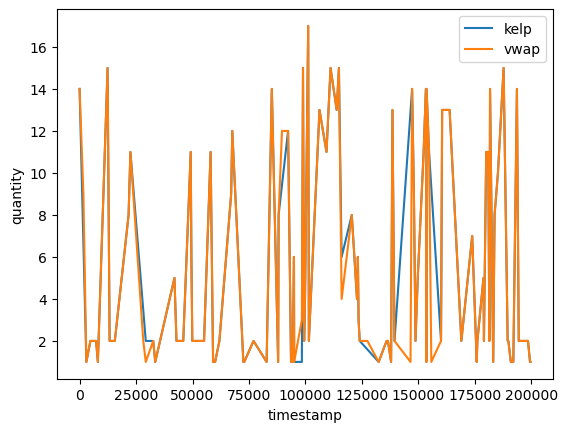

In [102]:
sns.lineplot(data=kelplog_inf_buyer, x="timestamp", y="quantity", label="kelp")
sns.lineplot(data=vwap_inf_buyer, x="timestamp", y="quantity", label="vwap")
plt.show()

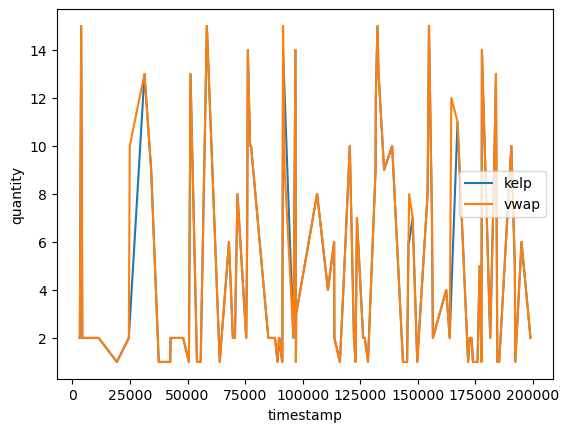

In [103]:
kelplog_inf_seller = kelp[kelp['seller'] == "InferredBot"]
vwap_inf_seller = d1[d1['seller'] == "InferredBot"]
vwap_inf_seller = vwap_inf_seller.drop(columns=['symbol', 'buyer'])
kelplog_inf_seller = kelplog_inf_seller.drop(columns=['symbol', 'buyer'])
sns.lineplot(data=kelplog_inf_seller, x="timestamp", y="quantity", label="kelp")
sns.lineplot(data=vwap_inf_seller, x="timestamp", y="quantity", label="vwap")
plt.show()

In [104]:
vwap_inf_seller.sort_values(by='quantity', ascending=False)

,timestamp,price,quantity,seller,Dist from VWAP
494,58400,2017,15,InferredBot,0.510638
481,132500,2014,15,InferredBot,0.538462
535,91500,2016,15,InferredBot,0.500000
309,154900,2016,15,InferredBot,1.000000
567,3800,2024,15,InferredBot,0.500000
...,...,...,...,...,...
474,128400,2014,1,InferredBot,0.553571
275,149800,2013,1,InferredBot,1.046512
513,171900,2018,1,InferredBot,0.500000
489,116200,2019,1,InferredBot,0.526316


In [105]:
kelplog_inf_seller.sort_values(by='quantity', ascending=False)

,timestamp,price,quantity,seller,Dist from VWAP
17,3800,2024,15,InferredBot,0.500000
709,154900,2016,15,InferredBot,1.000000
265,58400,2017,15,InferredBot,0.510638
612,132500,2014,15,InferredBot,0.538462
343,76200,2015,14,InferredBot,1.000000
...,...,...,...,...,...
417,91200,2016,1,InferredBot,0.500000
447,97100,2019,1,InferredBot,0.540984
592,128400,2014,1,InferredBot,0.553571
531,116200,2019,1,InferredBot,0.526316


In [106]:
merged_seller = kelplog_inf_seller.merge(vwap_inf_seller, on='timestamp', how='outer')
merged_seller.loc[:,['quantity_y', 'quantity_x']] = merged_seller.loc[:,['quantity_y', 'quantity_x']].fillna(0)
diff = (merged_seller['quantity_y']-merged_seller['quantity_x']).sum()
# x is kelp, y is vwap
print('Liquidity Model Sell Quantity - True Bot Sell Quantity: ', diff)

Liquidity Model Sell Quantity - True Bot Sell Quantity:  36.0


In [107]:
merged_seller[merged_seller['quantity_x'] > merged_seller['quantity_y']].sort_values(by='quantity_x', ascending=False)

,timestamp,price_x,quantity_x,seller_x,Dist from VWAP_x,price_y,quantity_y,seller_y,Dist from VWAP_y


In [108]:
merged_buyer = kelplog_inf_buyer.merge(vwap_inf_buyer, on='timestamp', how='outer')
merged_buyer.loc[:,['quantity_y', 'quantity_x']] = merged_buyer.loc[:,['quantity_y', 'quantity_x']].fillna(0)
diff = (merged_buyer['quantity_y']-merged_buyer['quantity_x']).sum()
# x is kelp, y is vwap  
print('Liquidity Model Buy Quantity - True Bot Buy Quantity: ', diff)
merged_buyer[merged_buyer['quantity_x'] > merged_buyer['quantity_y']].sort_values(by='quantity_x', ascending=False)

Liquidity Model Buy Quantity - True Bot Buy Quantity:  26.0


,timestamp,price_x,quantity_x,buyer_x,Dist from VWAP_x,price_y,quantity_y,buyer_y,Dist from VWAP_y
55,116000,2020.0,6.0,InferredBot,0.469388,2020,4,InferredBot,0.469388
13,29300,2026.0,2.0,InferredBot,0.484848,2026,1,InferredBot,0.484848


In [109]:
p = print
p(merged_seller[merged_seller['Dist from VWAP_y'] >= 1]['quantity_y'].sum())
p(merged_seller[merged_seller['Dist from VWAP_x'] >= 1]['quantity_x'].sum())

169
157.0


In [110]:
p(merged_buyer[merged_buyer['Dist from VWAP_y'] >= 1]['quantity_y'].sum())
p(merged_buyer[merged_buyer['Dist from VWAP_x'] >= 1]['quantity_x'].sum())

197
170.0


In [111]:
merged_buyer.sort_values('Dist from VWAP_y', ascending=False)

,timestamp,price_x,quantity_x,buyer_x,Dist from VWAP_x,price_y,quantity_y,buyer_y,Dist from VWAP_y
25,58000,2020.0,11.0,InferredBot,1.166667,2020,11,InferredBot,1.166667
75,153500,2016.0,1.0,InferredBot,1.137255,2016,1,InferredBot,1.137255
8,13300,2025.0,2.0,InferredBot,1.111111,2025,2,InferredBot,1.111111
67,139400,2016.0,2.0,InferredBot,1.090909,2016,2,InferredBot,1.090909
95,187700,2023.0,15.0,InferredBot,1.088235,2023,15,InferredBot,1.088235
...,...,...,...,...,...,...,...,...,...
4,7000,2026.0,2.0,InferredBot,0.465517,2026,2,InferredBot,0.465517
57,122800,2013.0,4.0,InferredBot,0.453125,2013,4,InferredBot,0.453125
44,98400,2020.0,1.0,InferredBot,0.447761,2020,3,InferredBot,0.447761
16,42000,2020.0,5.0,InferredBot,0.441176,2020,5,InferredBot,0.441176
